# Analysis with the rest feature

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
df=pd.read_csv("../data/games_mongodump.csv")
df.head()

,date_time,home_team,away_team,odd_home,odd_away,score_home,score_away,overtime,rest_time_home,rest_time_away,odd_point_home,odd_point_away,odd_prim_home,odd_prim_away
0,2015-03-13T01:00:00.000Z,Washington Wizards,Memphis Grizzlies,1.259740,4.030000,107,87,False,3.000000,0.979167,-0.31008658008658,2.7162174940898343,5.174610,2.643931
1,2015-03-12T04:30:00.000Z,Golden State Warriors,Detroit Pistons,1.050000,11.520000,105,98,False,2.020833,1.000000,-0.18763771514534752,9.910243902439024,2.505009,6.564878
2,2015-03-12T04:30:00.000Z,Portland Trail Blazers,Houston Rockets,1.729927,2.160000,105,100,False,4.062500,4.020833,0.06623938811365229,0.14638045891931908,6.481224,7.501726
3,2015-03-12T04:00:00.000Z,Phoenix Suns,Minnesota Timberwolves,1.490196,2.720000,106,97,False,2.000000,1.979167,-0.7249019607843137,-0.5002105263157895,4.430196,6.363021
4,2015-03-12T03:00:00.000Z,Denver Nuggets,Atlanta Hawks,3.450000,1.330033,115,102,False,2.000000,2.062500,1.1350719424460434,0.09696678380451829,4.629856,2.536949


In [47]:
# Generate Train and Test set
def generate_sets(df):
    # Label data
    label = pd.DataFrame(df["score_home"]>df["score_away"],
                         index=np.arange(len(df["score_home"])),columns=["home_wins"])
    # Select only the variables needed
    features = ['odd_home','odd_away','rest_time_home', 'rest_time_away','odd_point_home','odd_point_away',
                'odd_prim_home','odd_prim_away']
    X = df[features].join(label)
    Xset = clean_nan(X)
    Xset = Xset.reindex(np.random.permutation(Xset.index))
    m = np.ceil(len(Xset)*0.7)
    X_train = Xset.iloc[0:m]
    X_test = Xset.iloc[m:len(X)]
    return X_train, X_test

In [48]:
# Feature Scaling
def apply_feature_scaling(X_j):
    return (X_j - np.mean(X_j))/(np.max(X_j)-np.min(X_j))
def feature_scale(X,x_array):
    for x_i in x_array:
        X[x_i]=apply_feature_scaling(X[x_i]);

In [49]:
# Clean NaN Values 
def clean_nan(X):
    return X.fillna(0)

In [50]:
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [51]:
def plot_feature_space(X,x1,x2):
    plt.scatter(X[x1][X['home_wins']==True],X[x2][X['home_wins']==True],color='g',alpha=.5)
    plt.scatter(X[x1][X['home_wins']==False],X[x2][X['home_wins']==False],color='r',alpha=.5)
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.grid(True)
#     plt.xlim([0,25])
#     plt.ylim([0,25])
    plt.axis('equal')
    remove_border()

# Random dependant

In [53]:
X_train, X_test = generate_sets(df)
X_train.head()

/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: slice indexers when using iloc should be integers and not floating point
/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: slice indexers when using iloc should be integers and not floating point


,odd_home,odd_away,rest_time_home,rest_time_away,odd_point_home,odd_point_away,odd_prim_home,odd_prim_away,home_wins
1278,1.520833,2.590000,1.979167,2.916667,0.05608283002588445,0.1268571428571429,2.900142,7.014583,True
695,2.620000,1.510204,4.104167,1.083333,-0.2509644670050761,-3.90442700156986,12.866563,3.927194,True
625,1.080000,8.570000,3.062500,4.062500,-0.01306122448979593,1.8092848689771768,3.368750,19.885491,True
2808,2.280000,1.670000,2.041667,2.020833,-0.19102040816326538,0.15835051546391743,5.053125,3.051458,False
4877,3.410000,1.330000,1.000000,1.229167,0.6500000000000004,-0.13830508474576264,3.085000,1.739271,True


# Plotting

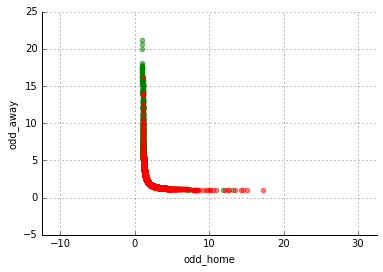

In [13]:
plot_feature_space(X_train,'odd_home','odd_away')

(0, 25)

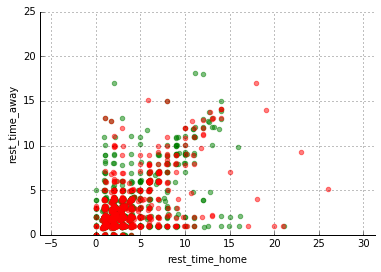

In [12]:
plot_feature_space(X_train,'rest_time_home','rest_time_away')
plt.xlim([0,25])
plt.ylim([0,25])

It appears that there is no clear trend like "the rested team wins"

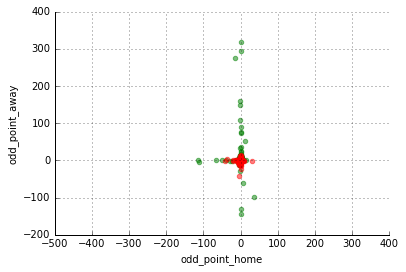

In [14]:
plot_feature_space(X_train,'odd_point_home','odd_point_away')

(-50, 50)

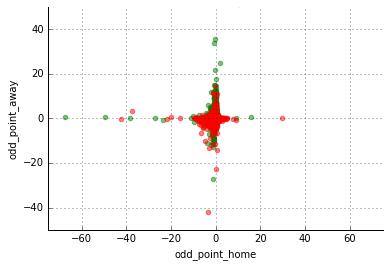

In [17]:
plot_feature_space(X_train,'odd_point_home','odd_point_away')
plt.xlim([-50,50])
plt.ylim([-50,50])

If abs(odd_point) depasse 40 pour la home team ou la away team, alors la home team wins

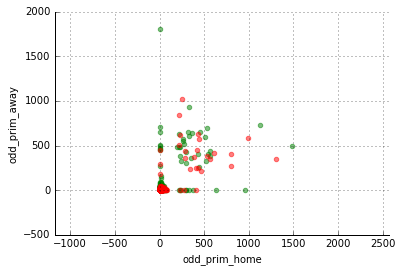

In [18]:
plot_feature_space(X_train,'odd_prim_home','odd_prim_away')

(0, 500)

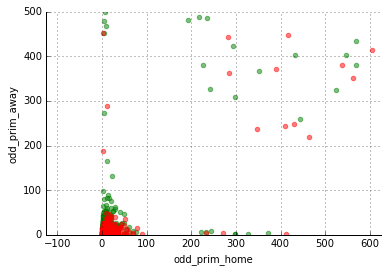

In [19]:
plot_feature_space(X_train,'odd_prim_home','odd_prim_away')
plt.xlim([0,500])
plt.ylim([0,500])

If odd_prim_away>50, home team  wins

(-50, 50)

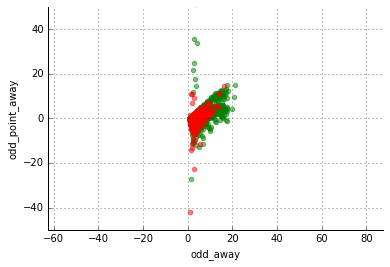

In [24]:
plot_feature_space(X_train,'odd_away','odd_point_away')
plt.xlim([0,25])
plt.ylim([-50,50])

# Training

In [26]:
X_train["odd_point_home"][105]
# 2 columns are of string type, and I don't know why!!

'-1.2162406015037592'

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [61]:
X_train, X_test = generate_sets(df)
fit_features = ['odd_home','odd_away','rest_time_home', 'rest_time_away',
                'odd_prim_home','odd_prim_away']
X = X_train[fit_features]
y = X_train['home_wins']
classifier.fit(X ,y)

/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: slice indexers when using iloc should be integers and not floating point
/home/lguitton/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: slice indexers when using iloc should be integers and not floating point


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
X = X_test[fit_features]
y = X_test['home_wins']
classifier.score(X,y)

0.69249297470895221

# Neural Networks